# Homework 1 -- Econ 213R
Data Cleaning, Describing, and Visualization


# Dataset 1: CSV

For the first dataset, let's take a look at avocado prices. I found this data on UCI's databank website

For this dataset regarding cars and various statistics regarding fuel consumption and performance, I want to determine the best and worst cars for the following criteria:
1. most horsepower per centimeter displacement
2. fastest acceleration per centimeter displacement
3. most horsepower relative to gas mileage. 

Rankings will be created for each of these three categories, by which all of the cars will be ranked at the end to produce the car with the best engine.


In [1]:
#importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json

import warnings
warnings.filterwarnings("ignore")

#loading in dataset
rownames = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
autos = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
                      header=None, names=rownames)

First, a visual inspection of the data to see what it contains:

In [2]:
autos.describe()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data must have some formatting problems, so let's look at the first ten observations:

In [3]:
autos.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0 8 307.0 130.0 3504. 12...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15.0 8 350.0 165.0 3693. 11...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18.0 8 318.0 150.0 3436. 11...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16.0 8 304.0 150.0 3433. 12...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17.0 8 302.0 140.0 3449. 10...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,15.0 8 429.0 198.0 4341. 10...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,14.0 8 454.0 220.0 4354. 9...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,14.0 8 440.0 215.0 4312. 8...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,14.0 8 455.0 225.0 4425. 10...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,15.0 8 390.0 190.0 3850. 8...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The .data file was formatted weirdly and was delimited with spaces instead of commas. Will need to modify arguments to acknowledge this difference in data format.

In [4]:
#reloading data with new argument for delimiter
rownames = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
autos = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
                      header=None, names=rownames, delim_whitespace=True)
#checking to see if data is now formatted correctly
autos.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


I'm interested in determining each of the variable types so I can determine what I can do to them later

In [5]:
autos.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

It appears that only horsepower needs to be changed to an int64 to be manipulable in future regressions, so let's see if I can change it:

In [6]:
autos['horsepower'] = pd.to_numeric(autos['horsepower'], errors='coerce')

#checking data types again to see if command worked
autos.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

The transformation of 'horsepower' to a float worked, so we can now manipulate it with basic commands. 

My first criteria of interest was to find which car had the most horsepower per centimeter displacement. 

In [7]:
#creating a new variable for this ratio    
autos['horsepower per centimeter'] = autos['horsepower'] / autos['displacement']

In [8]:
autos.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,horsepower per centimeter
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,0.423453
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,0.471429
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,0.471698
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,0.493421
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,0.463576
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500,0.461538
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala,0.484581
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii,0.488636
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina,0.494505
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl,0.487179


Now I want to rank all of the cars based on their horsepower per displacement ratio:


In [9]:
#sorting in descending order
autos.sort_values(by='horsepower per centimeter', ascending=False).head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,horsepower per centimeter
334,23.7,3,70.0,100.0,2420.0,12.5,80,3,mazda rx-7 gs,1.428571
71,19.0,3,70.0,97.0,2330.0,13.5,72,3,mazda rx2 coupe,1.385714
243,21.5,3,80.0,110.0,2720.0,13.5,77,3,mazda rx-4,1.375000
111,18.0,3,70.0,90.0,2124.0,13.5,73,3,maxda rx3,1.285714
54,35.0,4,72.0,69.0,1613.0,18.0,71,3,datsun 1200,0.958333
180,25.0,4,121.0,115.0,2671.0,13.5,75,2,saab 99le,0.950413
276,21.6,4,121.0,115.0,2795.0,15.7,78,2,saab 99gle,0.950413
81,28.0,4,97.0,92.0,2288.0,17.0,72,3,datsun 510 (sw),0.948454
23,26.0,4,121.0,113.0,2234.0,12.5,70,2,bmw 2002,0.933884
76,18.0,4,121.0,112.0,2933.0,14.5,72,2,volvo 145e (sw),0.925620


In [10]:
#creating a new variable to rank by this ratio  
autos['Rank_C'] = list(range(autos.shape[0]))
autos.Rank_C= autos.Rank_C + 1
autos.Rank_C.max()

398

In [11]:
#display the new ranking
autos.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,horsepower per centimeter,Rank_C
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,0.423453,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,0.471429,2
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,0.471698,3
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,0.493421,4
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,0.463576,5


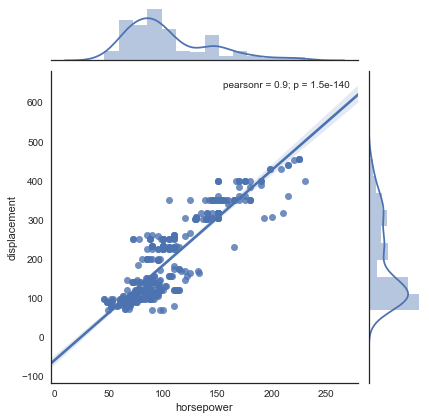

In [37]:
#graphing to find relationship between the acceleration and engine displacement

sns.set(rc={'figure.figsize':(6,6)})
sns.set(style="white", color_codes=True)
graph3 = sns.jointplot("horsepower", "displacement", data=autos, kind="reg")

It appears that the relationship between the two is very positive.

On to category 2: which car has the most acceleration per centimeter displacement?

In [12]:
#creating a new variable for this ratio    
autos['acceleration per centimeter'] = autos['acceleration'] / autos['displacement']
autos.head(10)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,horsepower per centimeter,Rank_C,acceleration per centimeter
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,0.423453,1,0.039088
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,0.471429,2,0.032857
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,0.471698,3,0.034591
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,0.493421,4,0.039474
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,0.463576,5,0.034768
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500,0.461538,6,0.023310
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala,0.484581,7,0.019824
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii,0.488636,8,0.019318
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina,0.494505,9,0.021978
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl,0.487179,10,0.021795


In [13]:
#sorting in descending order
autos = autos.sort_values(by='acceleration per centimeter', ascending=False)

In [14]:
#creating ranking by best acceleration
autos['Rank_A'] = list(range(autos.shape[0]))
autos.Rank_A= autos.Rank_A + 1

In [15]:
autos.Rank_A.max()

398

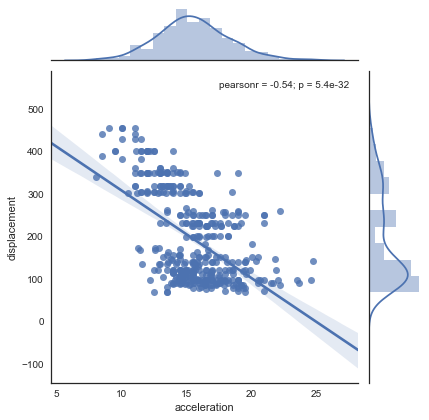

In [36]:
#graphing to find relationship between the acceleration and engine displacement

sns.set(rc={'figure.figsize':(6,6)})
sns.set(style="white", color_codes=True)
graph3 = sns.jointplot("acceleration", "displacement", data=autos, kind="reg")

According to this graph, it appears that the displacement of the engines is fairly discrete and very positively correlated with fast acceleration. 

Creating the ratio for the last criterium, horsepower per mpg:

In [16]:
#creating a new variable for this ratio    
autos['horsepower per mpg'] = autos['horsepower'] / autos['mpg']
autos.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,horsepower per centimeter,Rank_C,acceleration per centimeter,Rank_A,horsepower per mpg
131,32.0,4,71.0,65.0,1836.0,21.0,74,3,toyota corolla 1200,0.915493,132,0.295775,1,2.031250
117,29.0,4,68.0,49.0,1867.0,19.5,73,2,fiat 128,0.720588,118,0.286765,2,1.689655
53,31.0,4,71.0,65.0,1773.0,19.0,71,3,toyota corolla 1200,0.915493,54,0.267606,3,2.096774
326,43.4,4,90.0,48.0,2335.0,23.7,80,2,vw dasher (diesel),0.533333,327,0.263333,4,1.105991
195,29.0,4,85.0,52.0,2035.0,22.2,76,1,chevrolet chevette,0.611765,196,0.261176,5,1.793103
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,0.536082,395,0.253608,6,1.181818
54,35.0,4,72.0,69.0,1613.0,18.0,71,3,datsun 1200,0.958333,55,0.250000,7,1.971429
246,32.8,4,78.0,52.0,1985.0,19.4,78,3,mazda glc deluxe,0.666667,247,0.248718,8,1.585366
51,30.0,4,79.0,70.0,2074.0,19.5,71,2,peugeot 304,0.886076,52,0.246835,9,2.333333
59,23.0,4,97.0,54.0,2254.0,23.5,72,2,volkswagen type 3,0.556701,60,0.242268,10,2.347826


This graph shows us that there is clearly a relationship between horsepower and mpg, so there will be a best ranked car in this category as well.

In [17]:
#sorting in descending order
autos.sort_values(by='horsepower per mpg', ascending=False)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,horsepower per centimeter,Rank_C,acceleration per centimeter,Rank_A,horsepower per mpg
25,10.0,8,360.0,215.0,4615.0,14.0,70,1,ford f250,0.597222,26,0.038889,344,21.500000
28,9.0,8,304.0,193.0,4732.0,18.5,70,1,hi 1200d,0.634868,29,0.060855,291,21.444444
26,10.0,8,307.0,200.0,4376.0,15.0,70,1,chevy c20,0.651466,27,0.048860,310,20.000000
27,11.0,8,318.0,210.0,4382.0,13.5,70,1,dodge d200,0.660377,28,0.042453,327,19.090909
67,11.0,8,429.0,208.0,4633.0,11.0,72,1,mercury marquis,0.484848,68,0.025641,387,18.909091
95,12.0,8,455.0,225.0,4951.0,11.0,73,1,buick electra 225 custom,0.494505,96,0.024176,389,18.750000
94,13.0,8,440.0,215.0,4735.0,11.0,73,1,chrysler new yorker brougham,0.488636,95,0.025000,388,16.538462
90,12.0,8,429.0,198.0,4952.0,11.5,73,1,mercury marquis brougham,0.461538,91,0.026807,385,16.500000
124,11.0,8,350.0,180.0,3664.0,11.0,73,1,oldsmobile omega,0.514286,125,0.031429,372,16.363636
13,14.0,8,455.0,225.0,3086.0,10.0,70,1,buick estate wagon (sw),0.494505,14,0.021978,395,16.071429


In [18]:
#creating ranking by best horsepower per gas mileage
autos['Rank_B'] = list(range(autos.shape[0]))
autos.Rank_B= autos.Rank_B + 1
autos.Rank_B.max()

398

In [19]:
#display the new ranking
autos.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,horsepower per centimeter,Rank_C,acceleration per centimeter,Rank_A,horsepower per mpg,Rank_B
131,32.0,4,71.0,65.0,1836.0,21.0,74,3,toyota corolla 1200,0.915493,132,0.295775,1,2.031250,1
117,29.0,4,68.0,49.0,1867.0,19.5,73,2,fiat 128,0.720588,118,0.286765,2,1.689655,2
53,31.0,4,71.0,65.0,1773.0,19.0,71,3,toyota corolla 1200,0.915493,54,0.267606,3,2.096774,3
326,43.4,4,90.0,48.0,2335.0,23.7,80,2,vw dasher (diesel),0.533333,327,0.263333,4,1.105991,4
195,29.0,4,85.0,52.0,2035.0,22.2,76,1,chevrolet chevette,0.611765,196,0.261176,5,1.793103,5


Let's plot these two variables to detect a relationship:

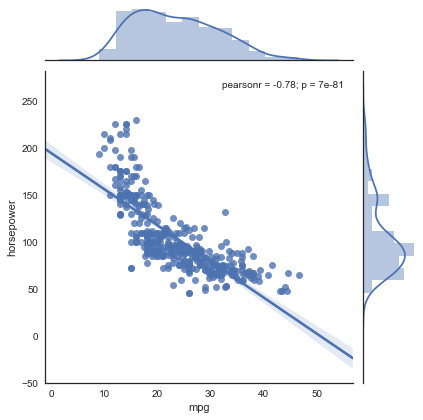

In [21]:

sns.set(rc={'figure.figsize':(6,6)})
sns.set(style="white", color_codes=True)
graph3 = sns.jointplot("mpg", "horsepower", data=autos, kind="reg")

Now, let's use Ranks A, B, and C to determine which car has the best performance (as derived from our rankings).

In [40]:
#creating ranking by all three ranks
autos['Rank_Total'] = autos.Rank_A + autos.Rank_B + autos.Rank_C
autos.Rank_Total.max() #this is our worst car

1013

In [41]:
autos.shape[0] #checking that we still only have 398 cars to consider

398

In [43]:
#sorting by total rank
autos.sort_values(by='Rank_Total', ascending=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,horsepower per centimeter,Rank_C,acceleration per centimeter,Rank_A,horsepower per mpg,Rank_B,Rank_Total
53,31.0,4,71.0,65.0,1773.0,19.0,71,3,toyota corolla 1200,0.915493,54,0.267606,3,2.096774,3,60
54,35.0,4,72.0,69.0,1613.0,18.0,71,3,datsun 1200,0.958333,55,0.250000,7,1.971429,7,69
19,26.0,4,97.0,46.0,1835.0,20.5,70,2,volkswagen 1131 deluxe sedan,0.474227,20,0.211340,25,1.769231,25,70
51,30.0,4,79.0,70.0,2074.0,19.5,71,2,peugeot 304,0.886076,52,0.246835,9,2.333333,9,70
59,23.0,4,97.0,54.0,2254.0,23.5,72,2,volkswagen type 3,0.556701,60,0.242268,10,2.347826,10,80
56,26.0,4,91.0,70.0,1955.0,20.5,71,1,plymouth cricket,0.769231,57,0.225275,20,2.692308,20,97
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto,NaN,33,0.193878,39,NaN,39,111
117,29.0,4,68.0,49.0,1867.0,19.5,73,2,fiat 128,0.720588,118,0.286765,2,1.689655,2,122
55,27.0,4,97.0,60.0,1834.0,19.0,71,2,volkswagen model 111,0.618557,56,0.195876,37,2.222222,37,130
131,32.0,4,71.0,65.0,1836.0,21.0,74,3,toyota corolla 1200,0.915493,132,0.295775,1,2.031250,1,134


In [49]:
#creating ranking for best to worst car
#creating ranking by best horsepower per gas mileage
autos['Rank_Total_Rank'] = list(range(autos.shape[0]))
autos.Rank_Total_Rank= autos.Rank_Total_Rank + 1
autos.Rank_Total_Rank.max()

398

In [51]:
#looking at our top ten cars
print("The top ten cars are:")
autos[['car name','Rank_Total_Rank']].head(10)


The top ten cars are:


,car name,Rank_Total_Rank
131,toyota corolla 1200,1
117,fiat 128,2
53,toyota corolla 1200,3
326,vw dasher (diesel),4
195,chevrolet chevette,5
394,vw pickup,6
54,datsun 1200,7
246,mazda glc deluxe,8
51,peugeot 304,9
59,volkswagen type 3,10


# Dataset #2 -- JSON

In [22]:
import json, urllib.request
with urllib.request.urlopen("https://data.cityofchicago.org/api/views/pfsx-4n4m/rows.json?accessType=DOWNLOAD") as url:
    data = json.loads(url.read().decode())
    print(data)

{'meta': {'view': {'id': 'pfsx-4n4m', 'name': 'Average Daily Traffic Counts', 'attribution': 'City of Chicago', 'attributionLink': 'http://www.cityofchicago.org', 'averageRating': 0, 'category': 'Transportation', 'createdAt': 1271943479, 'description': 'Average Daily Traffic (ADT) counts are analogous to a census count of vehicles on city streets. These counts provide a close approximation to the actual number of vehicles passing through a given location on an average weekday. Since it is not possible to count every vehicle on every city street, sample counts are taken along larger streets to get an estimate of traffic on half-mile or one-mile street segments. ADT counts are used by city planners, transportation engineers, real-estate developers, marketers and many others for myriad planning and operational purposes.\r\nData Owner: Transportation.\r\nTime Period: 2006.\r\nFrequency: A citywide count is taken approximately every 10 years. A limited number of traffic counts will be taken

This data has a long way to go before it's readable, so let's undertake parsing it to make more sense of it. 

In [23]:
import requests
get_request = requests.get("https://data.cityofchicago.org/api/views/pfsx-4n4m/rows.json?accessType=DOWNLOAD")
trans_dict = json.loads(get_request.text)
trans_dict.keys()

dict_keys(['meta', 'data'])

Now that we see the two sections of data in our JSON dataset, we can utilize "data" for our analysis. 

In [24]:
trans_data = pd.DataFrame(trans_dict['data'])
trans_data.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,3,B425520F-D2F7-4465-91E1-4F5A569D7591,3,1273067689,386464,1273067689,386464,None,2,1708 West,71st Street,1141891200,14600,East Bound: 6900 / West Bound: 7700,41.764877,-87.666635,"[None, 41.764877, -87.666635, None, False]"
1,4,6731875D-19E2-43EB-9F3D-70193ED904E8,4,1273067689,386464,1273067689,386464,None,3,1275 West,71st Street,1141113600,16500,East Bound: 7800 / West Bound: 8700,41.765008,-87.657067,"[None, 41.765008, -87.657067, None, False]"
2,5,3D988069-8547-4157-8439-753C344E34DD,5,1273067689,386464,1273067689,386464,None,5,920 West,71st Street,1141113600,18200,East Bound: 8800 / West Bound: 9400,41.765153,-87.647751,"[None, 41.765153, -87.647751, None, False]"
3,6,BA10D5D2-4127-4AC3-AE83-776261619F30,6,1273067689,386464,1273067689,386464,None,6,758 West,71st Street,1141113600,21600,East Bound: 10400 / West Bound: 11200,41.765204,-87.644371,"[None, 41.765204, -87.644371, None, False]"
4,7,64DE1122-CA6A-4FAF-86F1-CAF1FA70BFF9,7,1273067689,386464,1273067689,386464,None,7,240 East,71st St,1141113600,18300,East Bound: 9000 / West Bound: 9300,41.765644,-87.618476,"[None, 41.765644, -87.618476, None, False]"
5,8,8ED4FA7D-D7C4-44B8-BF65-08E0E4A19554,8,1273067689,386464,1273067689,386464,None,9,2050 East,71st St,1141891200,8600,East Bound: 3600 / West Bound: 5000,41.76626,-87.574226,"[None, 41.76626, -87.574226, None, False]"
6,9,B245296C-8B87-4AA5-AFF1-EF36A93DAA93,9,1273067689,386464,1273067689,386464,None,10,8539 South,Commercial Ave,1141718400,10000,North Bound: 5000 / South Bound: 5000,41.739836,-87.551476,"[None, 41.739836, -87.551476, None, False]"
7,10,A975E626-5672-44A2-A6FB-F8CEE548B50C,10,1273067689,386464,1273067689,386464,None,11,8933 South,Commercial Ave,1141718400,10500,North Bound: 4900 / South Bound: 5600,41.732725,-87.55132,"[None, 41.732725, -87.55132, None, False]"
8,11,863698F7-16E2-43F0-BEC7-B9F6651B29A1,11,1273067689,386464,1273067689,386464,None,12,9379 South,Commercial Ave,1141718400,12700,North Bound: 6000 / South Bound: 6700,41.724444,-87.551124,"[None, 41.724444, -87.551124, None, False]"
9,12,2E2744B4-ADDA-4271-A3AC-9C1B69FA777C,12,1273067689,386464,1273067689,386464,None,13,9730 South,Commercial Ave,1141718400,9000,North Bound: 4000 / South Bound: 5000,41.718183,-87.551016,"[None, 41.718183, -87.551016, None, False]"


This looks like a bit of a problem, because the file is identifying itself as having only "metadata" and "data", which means we will have no help identifying which data entry goes to which variable.


In [25]:
#we need to get the column names so we can keep only the relevant ones. 
list(trans_data.columns.values)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [26]:
#dropping the irrelevant columns
trans_data = trans_data.drop(columns=[0, 1, 2, 3, 4, 5, 6, 7, 9, 13, 16])

In [27]:
trans_data.head()

,8,10,11,12,14,15
0,2,71st Street,1141891200,14600,41.764877,-87.666635
1,3,71st Street,1141113600,16500,41.765008,-87.657067
2,5,71st Street,1141113600,18200,41.765153,-87.647751
3,6,71st Street,1141113600,21600,41.765204,-87.644371
4,7,71st St,1141113600,18300,41.765644,-87.618476


In [28]:
#renaming our columns according to the CSV file of the same date
trans_data.columns = ['ID', 'Street', 'Date', 'Total Vehicles', 'Latitude', 'Longitude',]

In [29]:
list(trans_data.columns.values)

['ID', 'Street', 'Date', 'Total Vehicles', 'Latitude', 'Longitude']

In [30]:
trans_data.head()

,ID,Street,Date,Total Vehicles,Latitude,Longitude
0,2,71st Street,1141891200,14600,41.764877,-87.666635
1,3,71st Street,1141113600,16500,41.765008,-87.657067
2,5,71st Street,1141113600,18200,41.765153,-87.647751
3,6,71st Street,1141113600,21600,41.765204,-87.644371
4,7,71st St,1141113600,18300,41.765644,-87.618476


Looks like we succesfully kept and relable columns with relevant data. Now let's find the day with the most recordings for traffic.

In [31]:
trans_data_date = trans_data.groupby('Date')['Street'].nunique()
trans_data_date.head()

Date
1138780800    1
1141113600    3
1141200000    2
1141286400    5
1141718400    4
Name: Street, dtype: int64

In [32]:
trans_data_date.groupby('Date').agg({"volume": np.sum, "number of observations": pd.Series.nunique}).head()

,volume,number of observations
Date,,
1138780800,1,1
1141113600,3,1
1141200000,2,1
1141286400,5,1
1141718400,4,1


I want to sort it here by the number volume to see which day entry had the greatest number of observations, but I was unsuccessful: https://stackoverflow.com/questions/15705630/python-getting-the-row-which-has-the-max-value-in-groups-using-groupby


Returning to visualization, we need to make sure that we can pair our latitude and longitude in order to plot them. I will create tuples from our latlong information now.

In [33]:
trans_data['lat_lon'] = list(zip(trans_data.Latitude, trans_data.Longitude))
trans_data['lat_lon'].head()

0    (41.764877, -87.666635)
1    (41.765008, -87.657067)
2    (41.765153, -87.647751)
3    (41.765204, -87.644371)
4    (41.765644, -87.618476)
Name: lat_lon, dtype: object

Time to map these points to a map of Chicago:

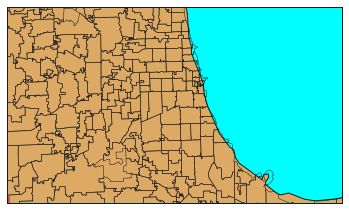

In [34]:
#creating map of Chicago

import mpl_toolkits.basemap as tkbm
from mpl_toolkits.basemap import Basemap
import os
import os.path
from os.path import expanduser

#us_shape_file_dir = "C:\Users\Malconius\Documents\Econ213Rcb_2017_us_zcta510_500k"
#os.chdir(us_shape_file_dir)

# Chicago coordinates.
lowerlon = -88.2 
upperlon = -87.2
lowerlat = 41.62
upperlat = 42.05


m = Basemap(
    llcrnrlon=lowerlon, #setting the coordinates of the shapefile to coordinate with my latitude and longitunial data
    llcrnrlat=lowerlat,
    urcrnrlon=upperlon,
    urcrnrlat=upperlat,
    resolution='h',
    projection='lcc',
    lat_0=lowerlat,
    lat_1=upperlat,
    lon_0=lowerlon,
    lon_1=upperlon,
    height = 4000,
    width = 4000
    )


m.readshapefile(r"C:\Users\Malconius\Documents\Econ213R\cb_2017_us_zcta510_500k", 'state')
#plt.gca().axis("off")
m.drawcoastlines() #making the coastlines bold 
m.drawmapboundary(fill_color='aqua') #coloring in map
m.fillcontinents(color='#ddaa66',lake_color='aqua')
trans_data['lat_lon'] = list(zip(trans_data.Latitude, trans_data.Longitude))
for i in trans_data['lat_lon']:
    x,y = i
    m.plot(x, y, marker = 'o', c='r', markersize=5,  latlon=False)
    #m.scatter(x, y, alpha=0.8, latlon=True)
plt.show()

According to these websites (and about fifty others), I coded everything correctly -- yet still couldn't get the lat-long data to plot itself on this map of Chicago. After it had plotted, was planning on highlighting the district with the highest traffic in order to warn commuters from using that district (it took me about 6 hours to get to this point). All I'm saying is that I put a ton of effort into using a package that is no longer functional in Python 3, only to get it to work, then have it not work. I would really appreciate partial credit for this section. 

https://www.kaggle.com/daveianhickey/using-basemap-for-geographical-data

https://basemaptutorial.readthedocs.io/en/latest/shapefile.html

# Dataset 3: Excel Spreadsheet 

In [79]:
schoolmeals = pd.read_excel(r"C:\Users\Malconius\Documents\Econ213R\schoolmeals.xlsx")

In [80]:

schoolmeals.info()# get some descriptive data about our variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
Fiscal Years               49 non-null int64
Free                       49 non-null object
Red. Price                 49 non-null object
Paid                       49 non-null object
Total                      49 non-null float64
Meals Served               49 non-null float64
Free/ RP of Total Meals    49 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 2.8+ KB


In [81]:
schoolmeals.columns.values

array(['Fiscal Years', 'Free', 'Red. Price', 'Paid', 'Total',
       'Meals Served', 'Free/ RP of Total Meals'], dtype=object)

Let's look at a simple graph of how some of the characteristics of this data set have changed over time. 

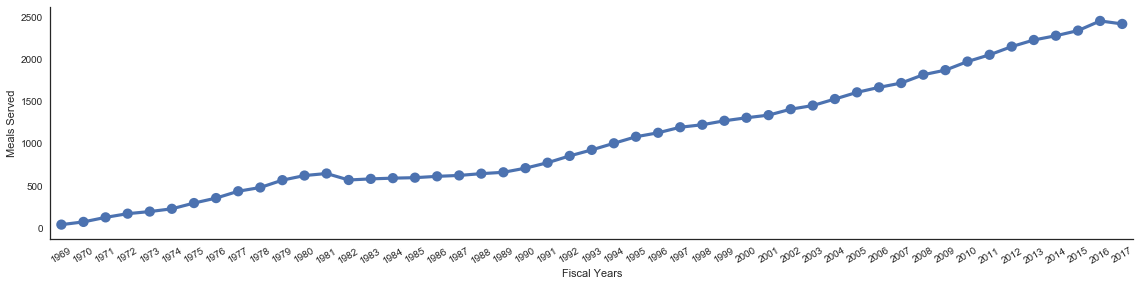

In [85]:
mealsperyear = sns.factorplot('Fiscal Years', 'Meals Served', data=schoolmeals, aspect=4)
mealsperyear.set_xticklabels(rotation=30)
